# Using the selected countries quarterly data:
## Understanding the relationship/s between MEVs

Counties selected/recommended by Achillie: US, Canada, Switzerland, China, Singap and Nigeria

The plan is as follow:
- Look at and investigate correlation:
  * Pairwise correlation (topic agnostic)
  * Pairwise correlation per topic 
- GLM: US GDP prediction using the other features
- Using Multiple linear regression: US GDP with all the other features
- Clustering
  * Normal clustering NOT time series one

**Import Libraries**

In [10]:
!pip install dataprep > /dev/null

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [59]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

In [23]:
df = pd.read_excel("MEV_all.xlsx", sheet_name="All_Merged")

In [24]:
df.head()

Years Quarters       Date  US_Unemp_Rate  US_Real_GDP     US_CPI  \
0   1948     Qtr1 1948-01-01       0.037333     2087.442  23.616667   
1   1948     Qtr2 1948-04-01       0.036667     2121.899  23.993333   
2   1948     Qtr3 1948-07-01       0.037667     2134.056  24.396667   
3   1948     Qtr4 1948-10-01       0.038333     2136.440  24.173333   
4   1949     Qtr1 1949-01-01       0.046667     2107.001  23.943333   

   US_Residential_index  Canada_GDP_current  Canada_CPI  Canada_Unemp_Rate  \
0                   NaN                 NaN         NaN                NaN   
1                   NaN                 NaN         NaN                NaN   
2                   NaN                 NaN         NaN                NaN   
3                   NaN                 NaN         NaN                NaN   
4                   NaN                 NaN         NaN                NaN   

   ...  China Quartely Nominal GDP, seasonaly adjusted  \
0  ...                                             NaN   
1  ...                                             NaN   
2  ...                                             NaN   
3  ...                                             NaN   
4  ...                                             NaN   

   China Quartely Unemployment Rate, seasonaly adjusted  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   China Quartely CPI, Not Seasonaly adjusted  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   China Quartely Residential Property Price Index, Not Seasonaly adjusted  \
0                                                NaN                         
1                                                NaN                         
2                                                NaN                         
3                                                NaN                         
4                                                NaN                         

   Singapore Quarterly Real Residential Property Prices, Not Seasonaly adjusted  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

   Singapore Quarterly Nominal GDP, Not Seasonaly adjusted  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   Singapore Quarterly Unemployment Rate (stats.mom.gov.sg)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Singapore Quarterly CPI (rateinflation.com)  Nigeria_GDP  Nigeria_CPI  
0                                          NaN          NaN          NaN  
1                                          NaN          NaN          NaN  
2                                          NaN          NaN          NaN  
3                                          NaN          NaN          NaN  
4            

In [25]:
df.shape

(298, 28)

In [26]:
df = df[(df.Years >= 1975) & (df.Years < 2022) ]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 108 to 295
Data columns (total 28 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   Years                                                                          188 non-null    int64         
 1   Quarters                                                                       188 non-null    object        
 2   Date                                                                           188 non-null    datetime64[ns]
 3   US_Unemp_Rate                                                                  188 non-null    float64       
 4   US_Real_GDP                                                                    188 non-null    float64       
 5   US_CPI                                                                         188 

In [27]:
df.head()

Years Quarters       Date  US_Unemp_Rate  US_Real_GDP     US_CPI  \
108   1975     Qtr1 1975-01-01       0.082667     5551.713  52.566667   
109   1975     Qtr2 1975-04-01       0.088667     5591.382  53.200000   
110   1975     Qtr3 1975-07-01       0.084667     5687.087  54.266667   
111   1975     Qtr4 1975-10-01       0.083000     5763.665  55.266667   
112   1976     Qtr1 1976-01-01       0.077333     5893.276  55.900000   

     US_Residential_index  Canada_GDP_current  Canada_CPI  Canada_Unemp_Rate  \
108                 60.02        4.189300e+10   21.991046           0.067000   
109                 60.96        4.343700e+10   22.517777           0.068333   
110                 61.16        4.558200e+10   23.255201           0.069667   
111                 62.22        4.713300e+10   23.729260           0.071333   
112                 62.86        4.907200e+10   24.071636           0.069333   

     ...  China Quartely Nominal GDP, seasonaly adjusted  \
108  ...                                             0.0   
109  ...                                             0.0   
110  ...                                             0.0   
111  ...                                             0.0   
112  ...                                             0.0   

     China Quartely Unemployment Rate, seasonaly adjusted  \
108                                                0.0      
109                                                0.0      
110                                                0.0      
111                                                0.0      
112                                                0.0      

     China Quartely CPI, Not Seasonaly adjusted  \
108                                         0.0   
109                                         0.0   
110                                         0.0   
111                                         0.0   
112                                         0.0   

     China Quartely Residential Property Price Index, Not Seasonaly adjusted  \
108                                                0.0                         
109                                                0.0                         
110                                                0.0                         
111                                                0.0                         
112                                                0.0                         

     Singapore Quarterly Real Residential Property Prices, Not Seasonaly adjusted  \
108                                                0.0                              
109                                                0.0                              
110                                                0.0                              
111                                                0.0                              
112                                                0.0                              

     Singapore Quarterly Nominal GDP, Not Seasonaly adjusted  \
108                                       1.408418e+09         
109                                       1.581769e+09         
110                                       1.581769e+09         
111                                       1.581769e+09         
112                                       1.581769e+09         

     Singapore Quarterly Unemployment Rate (stats.mom.gov.sg)  \
108                                                0.0          
109                                                0.0          
110                                                0.0          
111                                                0.0          
112                                                0.0          

     Singapore Quarterly CPI (rateinflation.com)   Nigeria_GDP  Nigeria_CPI  
108                                    42.676333  6.944734e+09     0.213009  
109                                    42.020333  6.944734e+09     0.213009  
110                                    42.389667

In [28]:
df.tail()

Years Quarters       Date  US_Unemp_Rate  US_Real_GDP      US_CPI  \
291   2020     Qtr4 2020-10-01       0.067667    18767.778  260.879000   
292   2021     Qtr1 2021-01-01       0.062000    19055.655  263.524667   
293   2021     Qtr2 2021-04-01       0.059000    19368.310  268.760333   
294   2021     Qtr3 2021-07-01       0.051000    19478.893  273.163333   
295   2021     Qtr4 2021-10-01       0.042333    19806.290  278.413333   

     US_Residential_index  Canada_GDP_current  Canada_CPI  Canada_Unemp_Rate  \
291                473.02        5.786020e+11  108.664735           0.089333   
292                484.29        6.026770e+11  109.744535           0.084000   
293                511.22        6.122040e+11  111.324730           0.078667   
294                539.60        6.278260e+11  112.667896           0.071667   
295                557.93        6.504220e+11  113.800369           0.063000   

     ...  China Quartely Nominal GDP, seasonaly adjusted  \
291  ...                                    2.956188e+13   
292  ...                                    2.479850e+13   
293  ...                                    2.815280e+13   
294  ...                                    2.899193e+13   
295  ...                                    3.242374e+13   

     China Quartely Unemployment Rate, seasonaly adjusted  \
291                                                0.0      
292                                                0.0      
293                                                0.0      
294                                                0.0      
295                                                0.0      

     China Quartely CPI, Not Seasonaly adjusted  \
291                                  111.200000   
292                                  112.810274   
293                                  112.103816   
294                                  112.178180   
295                                  113.182094   

     China Quartely Residential Property Price Index, Not Seasonaly adjusted  \
291                                           142.4072                         
292                                           143.7388                         
293                                           145.3747                         
294                                           145.9104                         
295                                           144.7351                         

     Singapore Quarterly Real Residential Property Prices, Not Seasonaly adjusted  \
291                                           103.1801                              
292                                           105.7492                              
293                                           105.8522                              
294                                           106.4112                              
295                                           110.0357                              

     Singapore Quarterly Nominal GDP, Not Seasonaly adjusted  \
291                                                NaN         
292                                                NaN         
293                                                NaN         
294                                                NaN         
295                                                NaN         

     Singapore Quarterly Unemployment Rate (stats.mom.gov.sg)  \
291                                              0.032          
292                                              0.029          
293                                              0.027          
294                                              0.026          
295                                              0.024          

     Singapore Quarterly CPI (rateinflation.com)   Nigeria_GDP  Nigeria_CPI  
291                                   100.095000  1.080734e+11          NaN  
292                                   100.898000           NaN          NaN  
293                                   101.

E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Switzerland Q...ted', 'China Quartel...ted', 'Singapore Qua...ted'


DataPrep Report
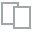
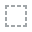
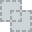
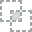
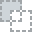
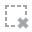
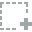
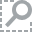
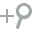
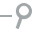
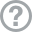
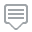
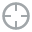
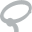
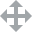
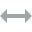
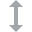
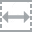
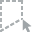
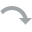
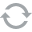
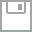
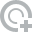
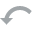
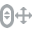
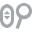
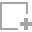
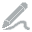
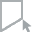
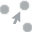
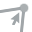
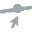

In [29]:
create_report(df)

**GLM, Predicting US GDP using other metrics**

In [32]:
df.fillna(0,inplace=True)

In [34]:
y = df['US_Real_GDP']
X = df.drop(columns = ['Years','Quarters','Date','US_Real_GDP'])

# with GLM (generalized linear model)
leu_model_all = sm.GLM(
    y,
    sm.add_constant(X),
    family=sm.families.Binomial(
        link=sm.genmod.families.links.logit()
        )
    ).fit()

print(leu_model_all.summary())

# We can check the AIC to evaluate the model (lower is better)
print("AIC:", leu_model_all.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            US_Real_GDP   No. Observations:                  188
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 06 Jul 2022   Deviance:                   2.0773e+08
Time:                        13:17:03   Pearson chi2:                 1.40e+26
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

**Correlation and pairwise correlation**

In [40]:

df = df.drop(columns=['Years','Quarters'])

In [43]:
df = df.set_index('Date')

In [47]:
# rename columns so it fit



df.columns = ['US_Unemp_Rate', 'US_Real_GDP', 'US_CPI', 'US_Residential_index',
       'Canada_GDP_current', 'Canada_CPI', 'Canada_Unemp_Rate',
       'Canada_Residential_index', 'UAE_Residential_Index', 'UAE_GDP',
       'UAE_CPI', 'Switzerland GDP, SA', 'Switzerland Unemployment Rate, SA',
       'Switzerland CPI, NSA', 'Switzerland Residential Index, NSA',
       'China GDP, SA', 'China Unemployment Rate, SA', 'China CPI, NSA',
       'China Residential Index, NSA', 'Singapore Residential Prices, NSA',
       'Singapore GDP, NSA', 'Singapore Unemployment Rate',
       'Singapore CPI', 'Nigeria_GDP', 'Nigeria_CPI']

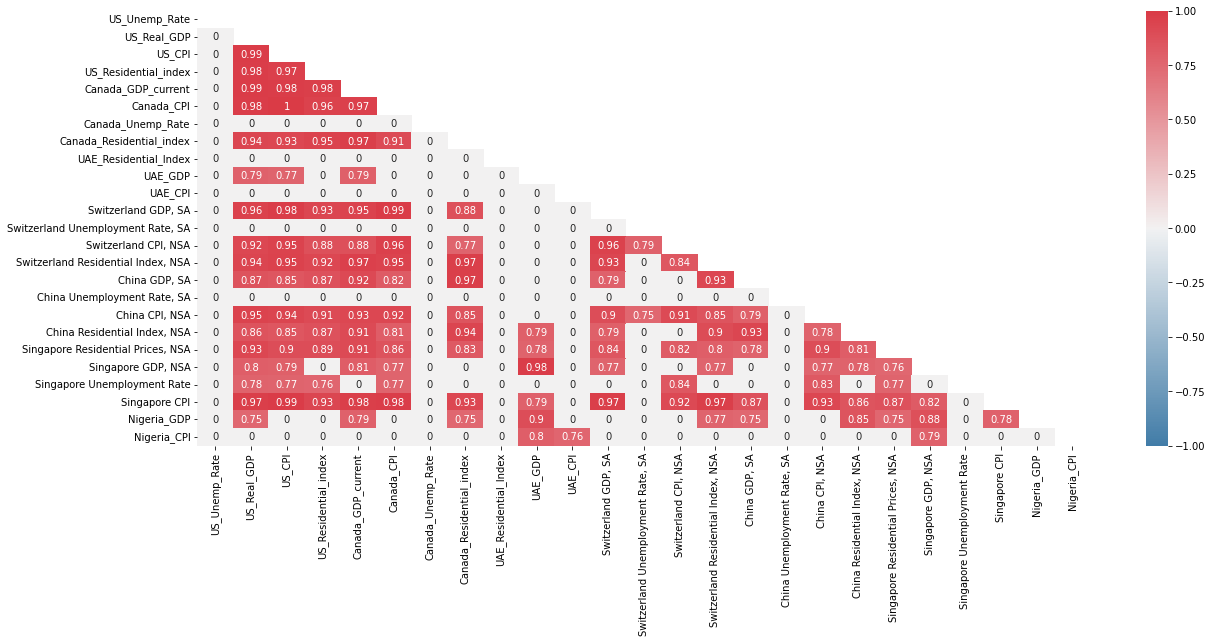

In [54]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

corr[abs(corr) <= 0.75] = 0

plt.figure(figsize=(20,8))
sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True
);

**GDP Pairwise correlation**

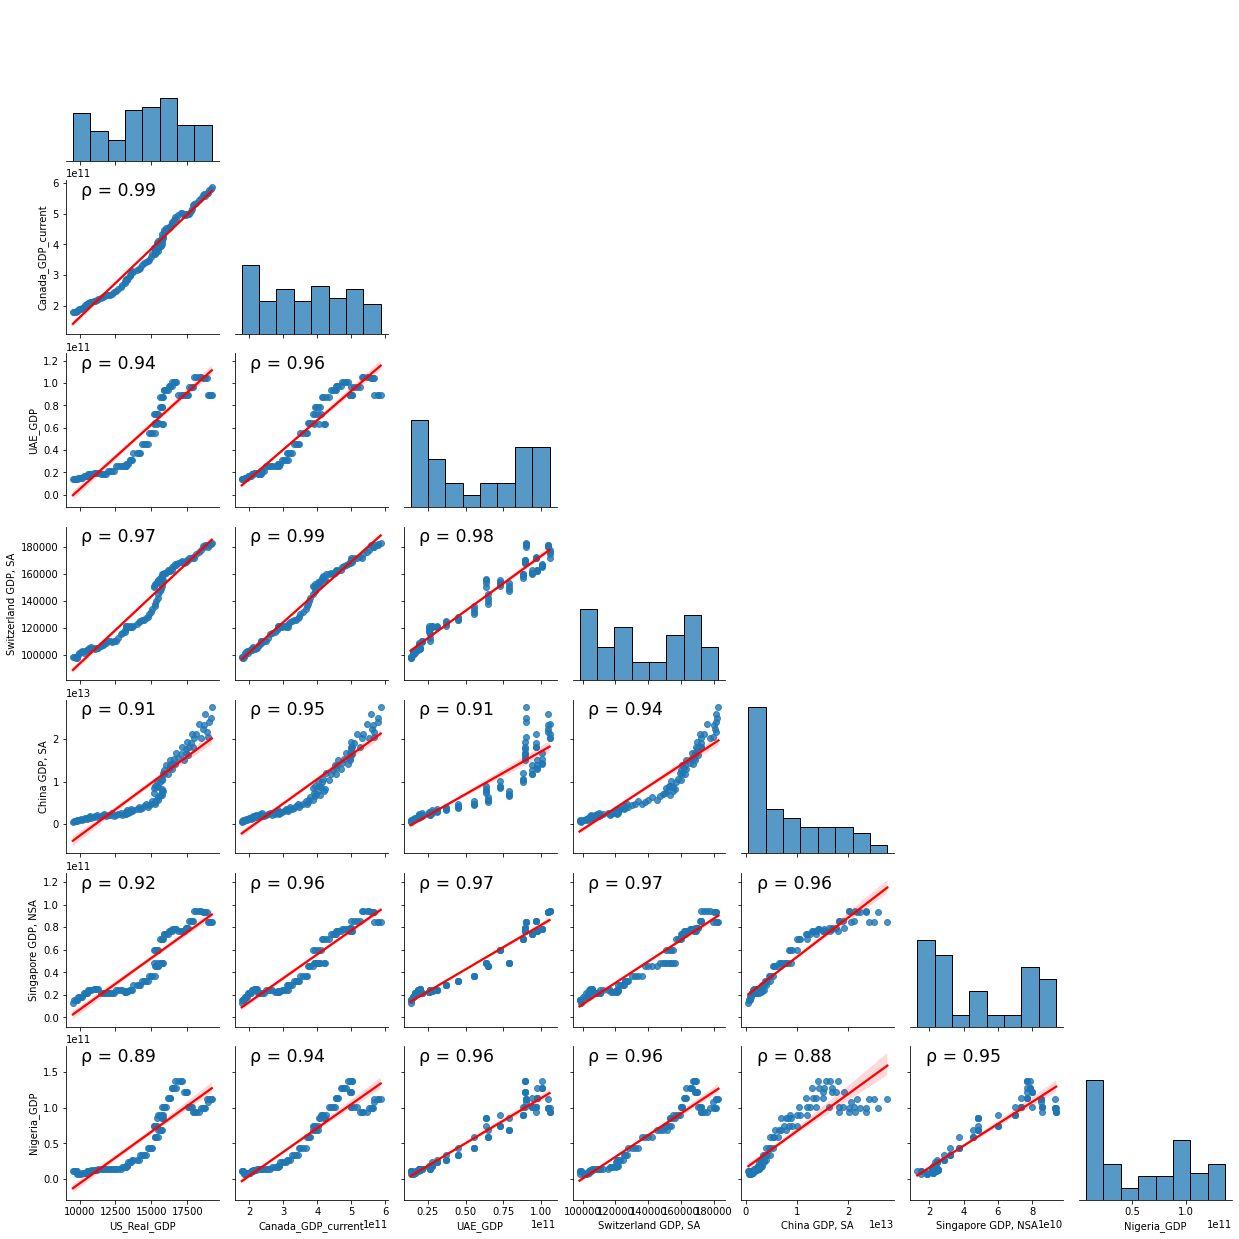

In [73]:
# divide them into 4 dataframes

gdp_df = df[['US_Real_GDP', 'Canada_GDP_current', 'UAE_GDP', 'Switzerland GDP, SA',
       'China GDP, SA', 'Singapore GDP, NSA', 'Nigeria_GDP']]
       
gdp_df = gdp_df[(gdp_df != 0).all(1)]

unempRate_df = df[['US_Unemp_Rate', 'Canada_Unemp_Rate', 'Switzerland Unemployment Rate, SA',
      'China Unemployment Rate, SA', 'Singapore Unemployment Rate']]

unempRate_df = unempRate_df[(unempRate_df != 0).all(1)]


cpi_df = df[['US_CPI', 'Canada_CPI', 'UAE_CPI', 'Switzerland CPI, NSA',
             'China CPI, NSA', 'Singapore CPI', 'Nigeria_CPI']]

cpi_df = cpi_df[(cpi_df != 0).all(1)]


residential_df = df[['US_Residential_index', 'Canada_Residential_index', 'UAE_Residential_Index',
                     'Switzerland Residential Index, NSA', 'China Residential Index, NSA', 
                     'Singapore Residential Prices, NSA']]


residential_df = residential_df[(residential_df != 0).all(1)]



def corr_annot(x, y, ax=None, **kws):
    """Annotate a plot w/ the correlation coefficient."""
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()
    fontsizes = {range(0,21):"medium", range(21,51):'large', range(51,81):'x-large', range(90,101):'xx-large'}

    if r > 0:
        font_size = [fontsize for bound,fontsize in fontsizes.items() if round(abs(r), 1)*100 in bound][0]
        ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize = font_size)





g = sns.pairplot(gdp_df, 
                 kind = "reg",
                 corner = True,
                 plot_kws = {
                     'line_kws':{'color':'red'},
                     #'logistic':True
                     #'lowess':True
                     });

g.map_lower(corr_annot);       

**Unemployment Paiwise correlation**

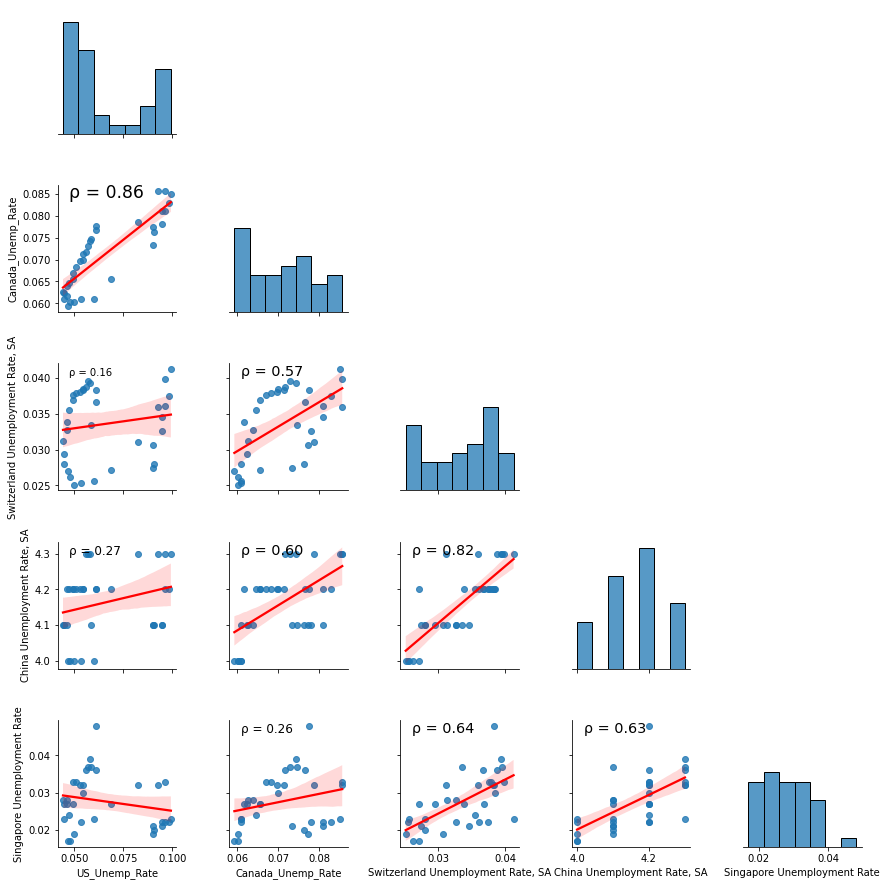

In [74]:
g = sns.pairplot(unempRate_df, 
                 kind = "reg",
                 corner = True,
                 plot_kws = {
                     'line_kws':{'color':'red'},
                     #'logistic':True
                     #'lowess':True
                     });

g.map_lower(corr_annot);  

**CPI Pairwise correlation**

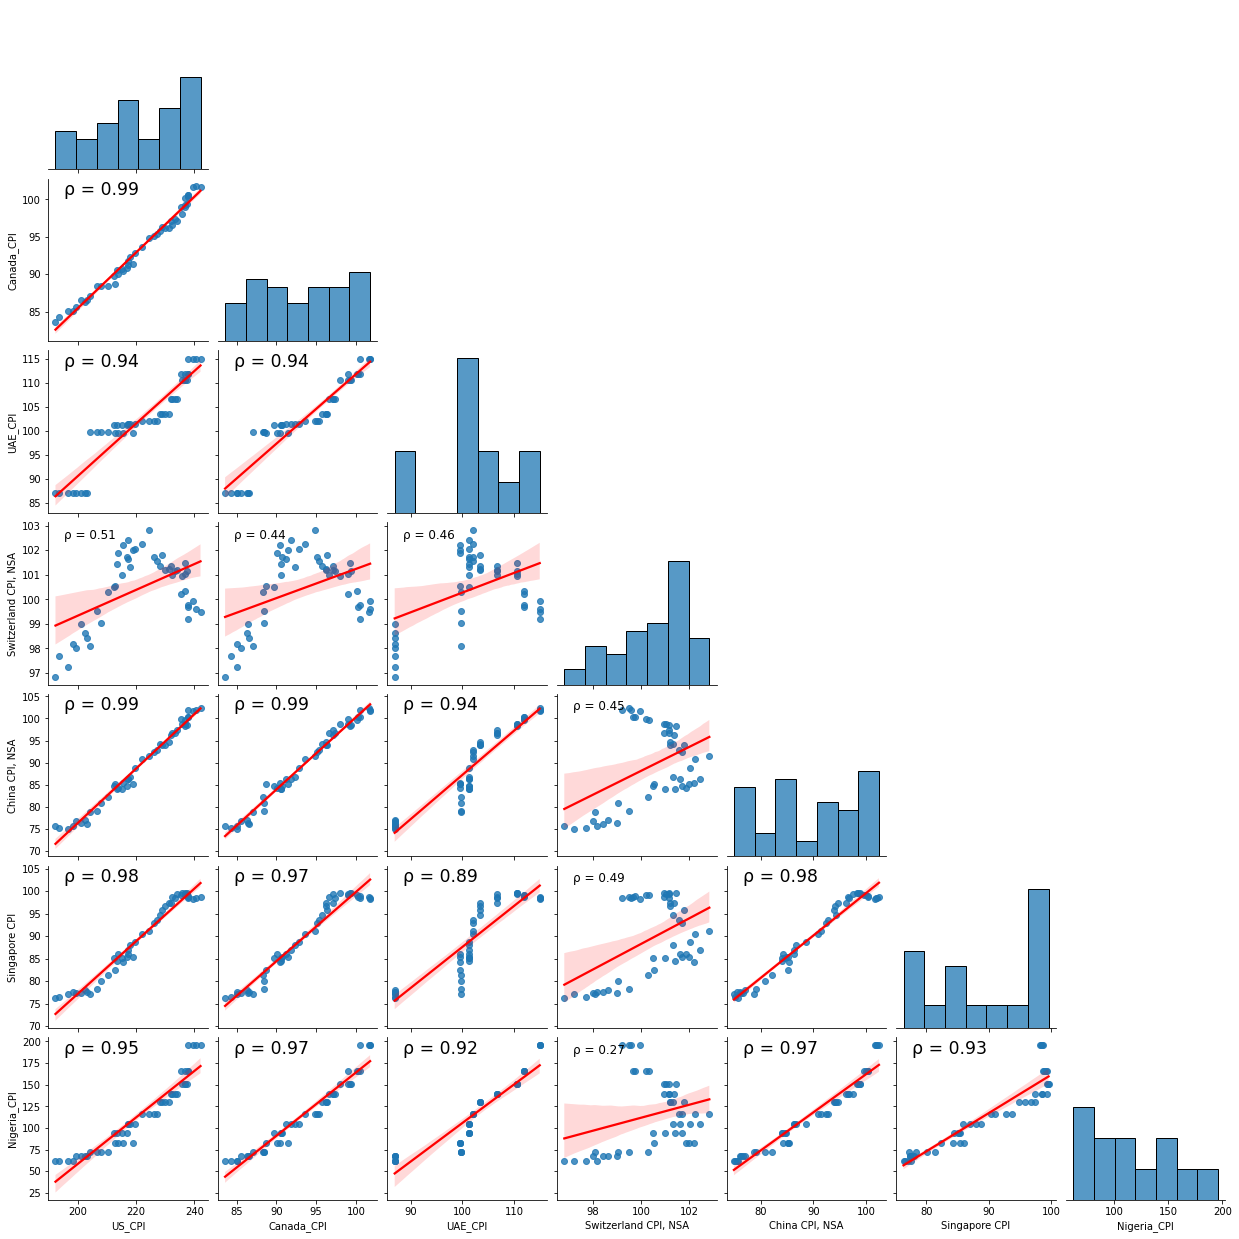

In [75]:
g = sns.pairplot(cpi_df, 
                 kind = "reg",
                 corner = True,
                 plot_kws = {
                     'line_kws':{'color':'red'},
                     #'logistic':True
                     #'lowess':True
                     });

g.map_lower(corr_annot); 

**Residential Index Pairwise correlation**

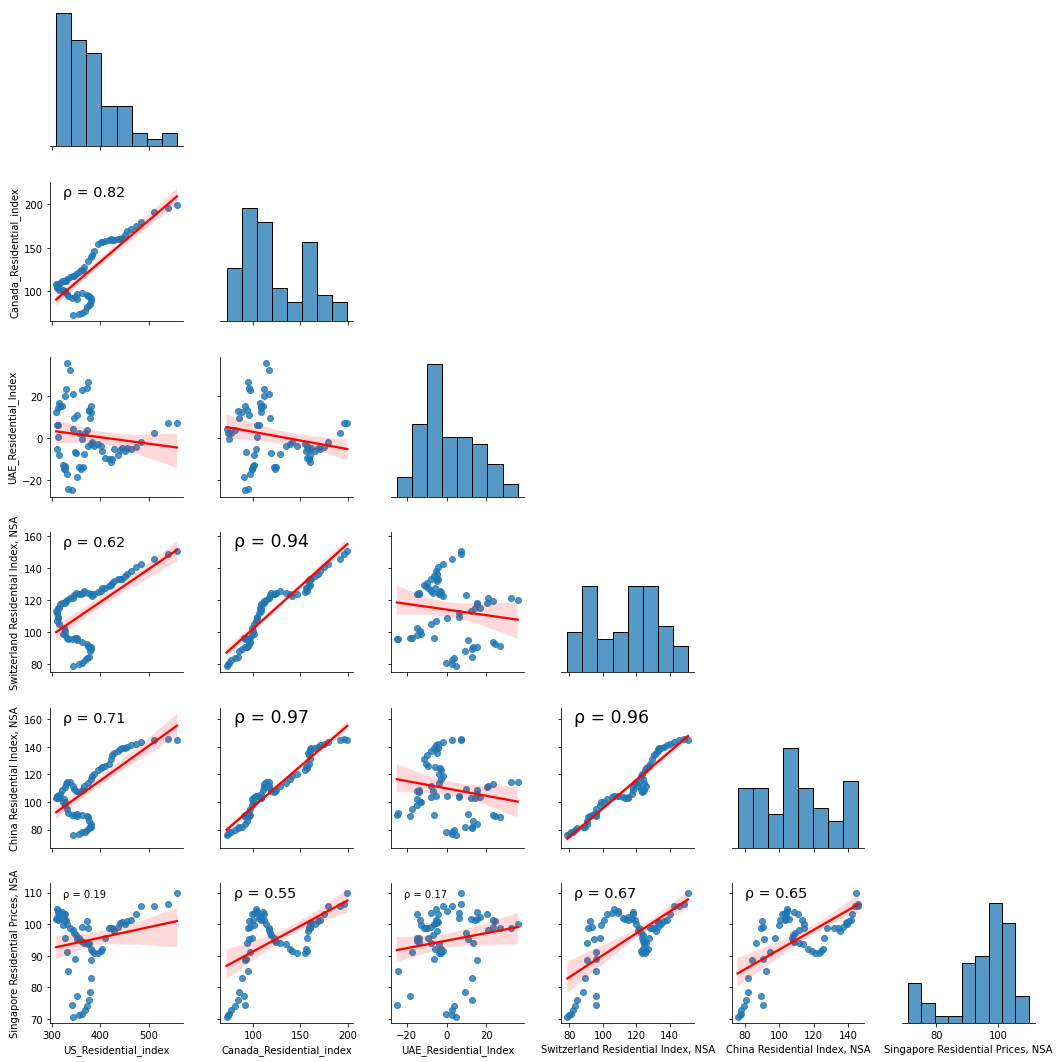

In [76]:
g = sns.pairplot(residential_df, 
                 kind = "reg",
                 corner = True,
                 plot_kws = {
                     'line_kws':{'color':'red'},
                     #'logistic':True
                     #'lowess':True
                     });

g.map_lower(corr_annot); 

**Multiple Linear Regression, Predicting US GDP using other metrics**

Although Multicollinearity is evident in the datasets through previously calculated correlation heatmap

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=123)

In [62]:
pipe = Pipeline(steps = [("standard_scale", StandardScaler()),
                              ("modeling", LinearRegression())])

scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

In [63]:
print('MAE', metrics.mean_absolute_error(y_test, pred))
print('MSE', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 Score', metrics.r2_score(y_test, pred))

MAE 66.05709150511491
MSE 7160.302416836561
RMSE 84.61857016539905
R2 Score 0.9995777157733187


In [65]:
model = pipe['modeling']

pd.DataFrame({
    'Feature': X_train.columns,
    'Coef': model.coef_
}).sort_values(by=['Coef'], ascending=False)

Feature         Coef
3                                  Canada_GDP_current  2167.322470
1                                              US_CPI  2027.003895
4                                          Canada_CPI   744.141810
8                                             UAE_GDP   309.212724
18  Singapore Quarterly Real Residential Property ...   267.356595
2                                US_Residential_index   247.188629
16         China Quartely CPI, Not Seasonaly adjusted   171.276677
22                                        Nigeria_GDP   127.318945
11  Switzerland Quartely Unemployment Rate(All Age...    85.999812
20  Singapore Quarterly Unemployment Rate (stats.m...    84.812808
14     China Quartely Nominal GDP, seasonaly adjusted    81.796266
23                                        Nigeria_CPI    46.375030
9                                             UAE_CPI     5.827041
12   Switzerland Quartely CPI, Not Seasonaly adjusted   -29.366374
5                                   Canada_Unemp_Rate   -29.894365
13  Switzerland Quartely Residential Property Pric...   -39.641124
15  China Quartely Unemployment Rate, seasonaly ad...   -49.615457
7                               UAE_Residential_Index   -73.583087
0                                       US_Unemp_Rate  -167.363067
17  China Quartely Residential Property Price Inde...  -199.422908
6                   Canada_Residential_property_index  -221.616182
19  Singapore Quarterly Nominal GDP, Not Seasonaly...  -239.715122
10  Switzerland Quartely Nominal GDP, seasonaly ad...  -486.630328
21        Singapore Quarterly CPI (rateinflation.com)  -915.319858

# Clustering

In [77]:
df.head()

US_Unemp_Rate  US_Real_GDP     US_CPI  US_Residential_index  \
Date                                                                      
1975-01-01       0.082667     5551.713  52.566667                 60.02   
1975-04-01       0.088667     5591.382  53.200000                 60.96   
1975-07-01       0.084667     5687.087  54.266667                 61.16   
1975-10-01       0.083000     5763.665  55.266667                 62.22   
1976-01-01       0.077333     5893.276  55.900000                 62.86   

            Canada_GDP_current  Canada_CPI  Canada_Unemp_Rate  \
Date                                                            
1975-01-01        4.189300e+10   21.991046           0.067000   
1975-04-01        4.343700e+10   22.517777           0.068333   
1975-07-01        4.558200e+10   23.255201           0.069667   
1975-10-01        4.713300e+10   23.729260           0.071333   
1976-01-01        4.907200e+10   24.071636           0.069333   

            Canada_Residential_index  UAE_Residential_Index       UAE_GDP  \
Date                                                                        
1975-01-01                   12.1150                    0.0  3.680168e+09   
1975-04-01                   12.5117                    0.0  4.803256e+09   
1975-07-01                   12.9085                    0.0  4.803256e+09   
1975-10-01                   13.4376                    0.0  4.803256e+09   
1976-01-01                   14.0151                    0.0  4.803256e+09   

            ...  China GDP, SA  China Unemployment Rate, SA  China CPI, NSA  \
Date        ...                                                               
1975-01-01  ...            0.0                          0.0             0.0   
1975-04-01  ...            0.0                          0.0             0.0   
1975-07-01  ...            0.0                          0.0             0.0   
1975-10-01  ...            0.0                          0.0             0.0   
1976-01-01  ...            0.0                          0.0             0.0   

            China Residential Index, NSA  Singapore Residential Prices, NSA  \
Date                                                                          
1975-01-01                           0.0                                0.0   
1975-04-01                           0.0                                0.0   
1975-07-01                           0.0                                0.0   
1975-10-01                           0.0                                0.0   
1976-01-01                           0.0                                0.0   

            Singapore GDP, NSA  Singapore Unemployment Rate  Singapore CPI  \
Date                                                                         
1975-01-01        1.408418e+09                          0.0      42.676333   
1975-04-01        1.581769e+09                          0.0      42.020333   
1975-07-01        1.581769e+09                          0.0      42.389667   
1975-10-01        1.581769e+09                          0.0      42.156333   
1976-01-01        1.581769e+09                          0.0      42.102667   

             Nigeria_GDP  Nigeria_CPI  
Date                                   
1975-01-01  6.944734e+09     0.213009  
1975-04-01  6.944734e+09     0.213009  
1975-07-01  6.944734e+09     0.213009  
1975-10-01  6.944734e+09     0.213009  
1976-01-01  9.077221e+09     0.239386  

[5 rows x 25 columns]

For n_clusters = 2 The average silhouette_score is : 0.6091
For n_clusters = 3 The average silhouette_score is : 0.5352
For n_clusters = 4 The average silhouette_score is : 0.5434
For n_clusters = 5 The average silhouette_score is : 0.5792
For n_clusters = 6 The average silhouette_score is : 0.5762
For n_clusters = 7 The average silhouette_score is : 0.3136
For n_clusters = 8 The average silhouette_score is : 0.2909
For n_clusters = 9 The average silhouette_score is : 0.3284


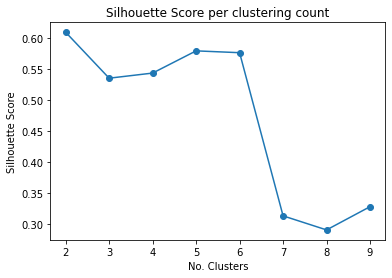

In [80]:
silhouette_s = []

for n_clusters in range(2, 10):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])

    cluster_labels = kmeans_pipeline.fit_predict(df)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(df, cluster_labels))

plt.plot(range(2, 10),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per clustering count")
plt.show()

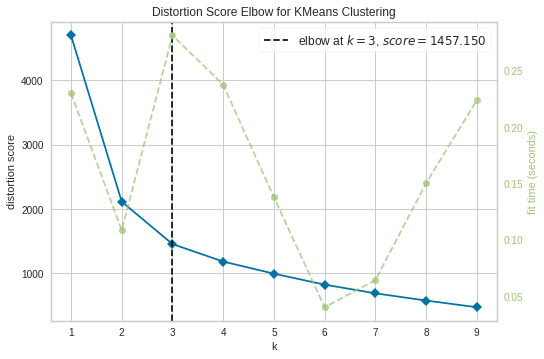

In [84]:
# More fancy and viasually way to do the elbow method approach:

# Libraries and modules Installation:
# pip install yellowbrick

# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# List with Features:
features = list(df.columns)

# Setting up the content of variable 'X':
X = df.loc[:,features].values

numeric_transformer = Pipeline(steps=[('Scaling', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)

# Clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X) 
visualizer.poof() 

In [114]:
n_clusters = 3
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean')),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=123, verbose=0)),
    ]
)
kmeans_pipeline.fit(df)
labels = kmeans_pipeline.predict(df)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

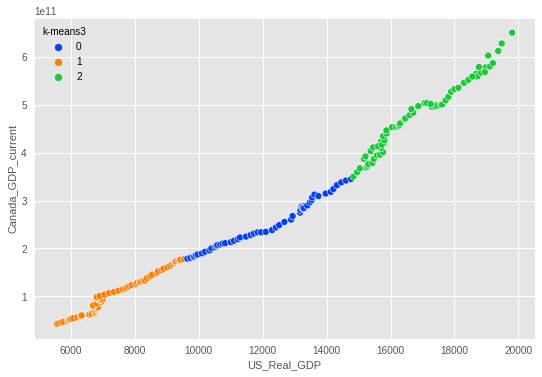

In [115]:
df["k-means3"] = labels
sns.scatterplot(data=df, x="US_Real_GDP", y="Canada_GDP_current", hue="k-means3",palette='bright')

In [97]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
